In [1]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

In [4]:
# data= pd.read_csv("data/output.csv", header=None)
# print(len(data))


# # Function to extract key-value pairs from strings
# def extract_key_values(row):
#     key_value_dict = {}
#     items = row.split(";")
#     for item in items:
#         # Split the key-value parts (e.g., jitter:pass/observed:0.00099/expected:1)
#         key, value_str = item.split(":", 1)
#         # Further split the remaining part (e.g., pass/observed:0.00099/expected:1)
#         sub_items = value_str.split("/")
#         for sub_item in sub_items:
#             if ":" in sub_item:
#                 sub_key, sub_value = sub_item.split(":", 1)
#                 column_name = f"{key}_{sub_key}"  # Create dynamic column name
#                 key_value_dict[column_name] = sub_value
#     return key_value_dict



# # Extract VLAN values from column 3
# # Extract VLAN values and replace column 3
# data[3] = data[3].str.extract(r'VLAN:(\d+)', expand=False)
# data[4] = data[4].str.extract(r'type:(.*)', expand=False)
# data[5] = data[5].str.extract(r'max_duration:(\d+)', expand=False)
# data[6] = data[6].str.extract(r'tx_frames:(\d+)', expand=False)


# # Split column 7 into multiple columns by `;`
# expanded_columns = data[7].apply(extract_key_values).apply(pd.Series)

# # Merge the expanded columns back into the DataFrame
# data = pd.concat([data, expanded_columns], axis=1)

# # Drop the original column 7 if desired
# data.drop(columns=[7], inplace=True)

# # Rename column 3 to 'VLAN' for clarity
# data.rename(columns={3: 'VLAN'}, inplace=True)
# data.rename(columns={4: 'type'}, inplace=True)
# data.rename(columns={5: 'max_duration'}, inplace=True)
# data.rename(columns={6: 'tx_frame'}, inplace=True)


# data['jitter'] = (data['jitter_observed'] > data['jitter_expected']).astype(int)
# data['latency'] = (data['latency_observed'] > data['latency_expected']).astype(int)
# data['out_of_sequence'] = (data['out_of_sequence_observed'] > data['out_of_sequence_expected']).astype(int)
# data['frame_loss'] = (data['frame_loss_observed'] > data['frame_loss_expected']).astype(int)

# # Convert nanoseconds to datetime
# data['datetime'] = pd.to_datetime(data[0], unit='ns')

# # Extract year, month, and day into separate columns
# data['year'] = data['datetime'].dt.year
# data['month'] = data['datetime'].dt.month
# data['day'] = data['datetime'].dt.day

# # Extract hour into a separate column
# data['hour'] = data['datetime'].dt.hour

# # Preserve the original timestamp column and drop the intermediate 'datetime' column
# data = data.drop(columns=['datetime'])

# # Save data to CSV
# data.to_csv('data/traffic_eng01.csv', index=False)


In [2]:
data = pd.read_csv("data/traffic_eng01.csv")

In [3]:
data

,0,1,2,VLAN,type,max_duration,tx_frame,jitter_observed,jitter_expected,latency_observed,...,frame_loss_observed,frame_loss_expected,jitter,latency,out_of_sequence,frame_loss,year,month,day,hour
0,1720336629573193297,SW17_Loop,1,401,emix,5,1000000,0.00099,1.00,0.00292,...,0,0,0,0,0,0,2024,7,7,7
1,1720336636820549484,SW15_Loop,2,402,emix,5,1000000,0.00393,1.00,0.00873,...,0,0,0,0,0,0,2024,7,7,7
2,1720336658595461474,SCL-SW03_Loop,5,405,emix,5,1000000,0.01000,1.00,151.15752,...,0,0,0,0,0,0,2024,7,7,7
3,1720336665842866508,SCL-SW04_Loop,6,406,emix,5,1000000,0.00652,1.00,112.81850,...,0,0,0,0,0,0,2024,7,7,7
4,1720336673057361396,SCL-SW04_Loop,7,406,random,5,1000000,0.00217,1.00,112.81411,...,0,0,0,0,0,0,2024,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468565,1736732800643444788,Vlan_501_BERToD_MIA-SW17,6,501,fx(9000),10,500000,0.00005,0.04,0.00313,...,0,0,1,0,0,0,2025,1,13,1
468566,1736732814188879316,Vlan_527_BERToD_JAX-SW02,7,527,fx(9000),10,500000,0.00081,0.04,6.89345,...,0,0,0,1,0,0,2025,1,13,1
468567,1736732827548838649,Vlan_528_BERToD_MIA-SW18,8,528,fx(9000),10,499758,0.00135,0.04,0.01230,...,0,0,0,0,0,0,2025,1,13,1
468568,1736732841039270530,Vlan_529_BERToD_MIA-SW16,9,529,fx(9000),10,500000,0.00082,0.04,0.01010,...,0,0,0,0,0,0,2025,1,13,1


In [16]:
# # Filter function for month and day
# def filter_date(df, year, month):
#     return  df[(df['year'] == year) & (df['month'] == month)]

# Filter function for month and day
def filter_failed(df, measure):
    return  df[df[measure] == 1]
 

In [5]:
data01 = data[~(data['VLAN'].astype(str).str.startswith('5') | (data['VLAN'] == 309) )]
data01 = data01[~((data01['year'] == 2024) & (data01['month'] < 9))]

data01['max_duration'].value_counts()


# df02 = df01[~df01['VLAN'].isin([501, 502, 505, 506, 510, 511, 513, 514, 515, 516, 517, 519, 520, 521, 522, 523, 525, 527, 529, 530, 309])]

max_duration
10    280727
30        46
50         4
25         2
Name: count, dtype: int64

In [18]:
import math
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

# Create the graph
G = nx.DiGraph()
G.add_edges_from([(401, 402), (402, "sw14"), ("sw14", 430)])
G.add_edges_from([(402, 428), (428, "jax-sw01"), ("jax-sw01", 415)])
G.add_edges_from([(402, 411), (411, 414)])
G.add_edges_from([(402, 411), (411, 417), (417, 420)])
G.add_edges_from([(402, 425), (425, 427)])
G.add_edges_from([(401, 424), (424, 410), (410, 416), (416, "sao-sw04-p3"), ("sao-sw04-p3", 405)])
G.add_edges_from([(416, "sao-sw04-p31"), ("sao-sw04-p31", 419)])
G.add_edges_from([(424, 413)])
G.add_edges_from([(424, 429), (429, 412)])
G.add_edges_from([(429, "sw10"), ("sw10", 418)])
G.add_edges_from([("sw10", "pty-sw01-p6"), ("pty-sw01-p6", 423)])
G.add_edges_from([(424, 422), (422, "sju-sw03"), ("sju-sw03", "pty-sw01-p1"), ("pty-sw01-p1", 421), (421, 406)])

In [19]:
# Define a function to compute edge usage
def compute_edge_usage(graph, target_nodes):
    edge_usage = {}
    visited_nodes = set()

    def dfs(node):
        if node in visited_nodes:
            return
        visited_nodes.add(node)
        for predecessor in graph.predecessors(node):
            edge = (predecessor, node)
            edge_usage[edge] = edge_usage.get(edge, 0) + 1
            dfs(predecessor)

    for target in target_nodes:
        visited_nodes.clear()
        dfs(target)

    return edge_usage

In [20]:
def draw_network_failures(data, measure, year, month, vlan):

    filtered_data = data[(data['year'] == year) & (data['month'] == month)]
    if vlan != "All":
        filtered_data = filtered_data[filtered_data['VLAN'] == vlan]
    failed_df = filter_failed(filtered_data, measure)
    non_failed_df = filtered_data

    # Compute edge usage for failures and all cases
    failed_edge_usage = compute_edge_usage(G, failed_df['VLAN'])
    all_edge_usage = compute_edge_usage(G, non_failed_df['VLAN'])

    failed_nodes = set(failed_df['VLAN'])

    # Assign node colors: red for failed nodes, lightblue otherwise
    node_colors = ['#FFDAC1' if node in failed_nodes else 'lightblue' for node in G.nodes]

    # Ensure all edges exist in both dictionaries
    for edge in G.edges:
        failed_edge_usage.setdefault(edge, 0)
        all_edge_usage.setdefault(edge, 0)

    # Compute failure ratio for edges
    failure_ratios = {
        edge: failed_edge_usage[edge] / all_edge_usage[edge] if all_edge_usage[edge] > 0 else 0
        for edge in G.edges
    }

    # Normalize failure ratio for colormap using the maximum failure ratio
    max_failure_ratio = max(failure_ratios.values()) if failure_ratios else 1
    cmap = plt.cm.plasma
    norm = mcolors.Normalize(vmin=0, vmax=max_failure_ratio)

    # Assign edge colors based on failure ratio
    edge_colors = [cmap(norm(failure_ratios[edge])) for edge in G.edges]

    # Compute edge labels: "failure_usage/total_usage"
    edge_labels = {
        edge: f"{failed_edge_usage[edge]}/{all_edge_usage[edge]}"
        for edge in G.edges
    }

    # Node positions
    pos = graphviz_layout(G, prog="dot")
    scaling_factor = 20.0
    pos = {node: (x * scaling_factor, y * scaling_factor) for node, (x, y) in pos.items()}

    # Draw the graph
    fig, ax = plt.subplots(figsize=(24, 8))

    # Draw edges with colormap based on failure ratio
    edge_lines = LineCollection(
        [(pos[u], pos[v]) for (u, v) in G.edges],
        colors=edge_colors,
        linewidths=2
    )
    ax.add_collection(edge_lines)

    nx.draw(G, 
            pos, 
            with_labels=True, 
            node_size=1400, 
            node_color=node_colors, 
            arrows=True, 
            font_size=10, 
            ax=ax)

    # Add colorbar for failure ratio
    cbar = fig.colorbar(
        plt.cm.ScalarMappable(norm=norm, cmap=cmap),
        ax=ax
    )
    cbar.set_label("Failure Ratio")

    # Draw edge labels with "failure_usage/total_usage"
    for (u, v) in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        xm, ym = (x0 + x1) / 2, (y0 + y1) / 2
        dx, dy = x1 - x0, y1 - y0
        length = (dx**2 + dy**2)**0.5 or 1
        perp_dx, perp_dy = -dy / length, dx / length
        offset = -100
        label_x = xm + perp_dx * offset
        label_y = ym + perp_dy * offset
        label = edge_labels[(u, v)]  # Label as "failure_usage/total_usage"
        plt.text(label_x, label_y, label, fontsize=8, color='black', ha='center', va='center')

    plt.show()


In [21]:
# Slider and dropdowns for interactivity
measure_slider = widgets.Dropdown(
    options=["jitter", "latency", "out_of_sequence", "frame_loss"],
    value="jitter",
    description="Failure Type:",
    style={'description_width': 'initial'}
)

vlan_options = ["All"] + sorted(data01['VLAN'].unique().tolist())
vlan_dropdown = widgets.Dropdown(
    options=vlan_options,
    value="All",
    description="VLAN:",
    style={'description_width': 'initial'}
)


year_slider = widgets.IntSlider(
    value=2024,
    min=2024,
    max=2030,
    step=1,
    description='Year:',
    style={'description_width': 'initial'}
)

month_slider = widgets.IntSlider(
    value=12,
    min=1,
    max=12,
    step=1,
    description='Month:',
    style={'description_width': 'initial'}
)


interact(draw_network_failures,
         data=widgets.fixed(data01),
         vlan=vlan_dropdown,
         measure=measure_slider,
         year=year_slider,
         month=month_slider
         )

interactive(children=(Dropdown(description='Failure Type:', options=('jitter', 'latency', 'out_of_sequence', '…

<function __main__.draw_network_failures(data, measure, year, month, vlan)>

In [189]:
# # measure = "jitter"
# measure = "latency"
# # measure = "out_of_sequence"
# # measure = "frame_loss"
# year = 2024
# month = 12
# draw_network_failures(data01, measure, year, month)

In [22]:
data01.columns
# print(data.head(5))
# for column in data01.columns:
#     print(f"{column}: {data01[column].unique()}")

Index(['0', '1', '2', 'VLAN', 'type', 'max_duration', 'tx_frame',
       'jitter_observed', 'jitter_expected', 'latency_observed',
       'latency_expected', 'out_of_sequence_observed',
       'out_of_sequence_expected', 'frame_loss_observed',
       'frame_loss_expected', 'jitter', 'latency', 'out_of_sequence',
       'frame_loss', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import ipywidgets as widgets
from IPython.display import display, clear_output


# Define the columns for correlation
columns = ['jitter', 'latency', 'out_of_sequence', 'frame_loss']

# Function to filter data and plot heatmap
def plot_heatmap(year, month):
    filtered_data = data01.copy()
    
    if year != "All":
        filtered_data = filtered_data[filtered_data['year'] == year]
    if month != "All":
        filtered_data = filtered_data[filtered_data['month'] == month]
    
    if filtered_data.empty:
        clear_output(wait=True)
        print("No data available for the selected filters.")
        return
    
    # Calculate the correlation matrix
    correlation_matrix = np.zeros((len(columns), len(columns)))
    for i in range(len(columns)):
        for j in range(len(columns)):
            if i == j:
                # Set diagonal elements to 1
                correlation_matrix[i, j] = 1.0
            else:
                # Calculate Pearson correlation for non-diagonal elements
                correlation, _ = pearsonr(filtered_data[columns[i]], filtered_data[columns[j]])
                correlation_matrix[i, j] = correlation


    # Clear previous output
    clear_output(wait=True)

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        xticklabels=columns,
        yticklabels=columns,
        cmap='coolwarm',
        fmt=".2f"
    )
    # plt.title(f"Pairwise Correlation Heatmap (Year: {year}, Month: {month})")
    plt.show()

# Widgets for year and month
year_widget = widgets.Dropdown(
    options=["All"] + sorted(data01['year'].unique()),
    value="All",
    description='Year:'
)

month_widget = widgets.Dropdown(
    options=["All"] + sorted(data01['month'].unique()),
    value="All",
    description='Month:'
)

# Display widgets and link them to the function
ui = widgets.VBox([year_widget, month_widget])
out = widgets.Output()

def update_heatmap(change):
    with out:
        plot_heatmap(year_widget.value, month_widget.value)

year_widget.observe(update_heatmap, names='value')
month_widget.observe(update_heatmap, names='value')

display(ui, out)
update_heatmap(None)  # Initial display



Output()

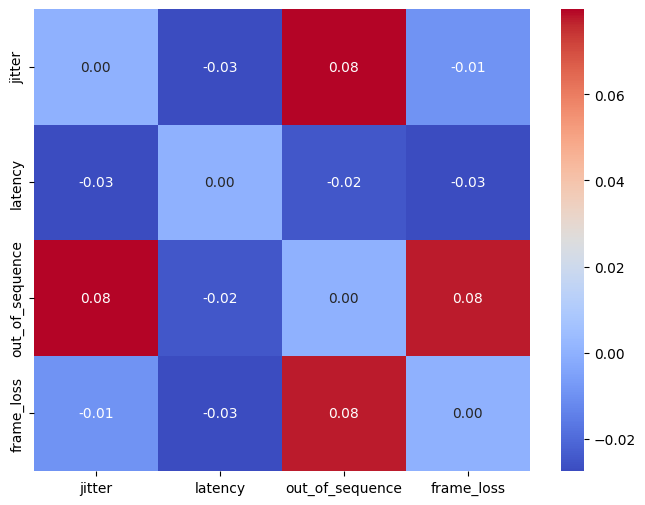

In [14]:
plot_heatmap("All", "All") 

In [24]:
data01.columns

Index(['0', '1', '2', 'VLAN', 'type', 'max_duration', 'tx_frame',
       'jitter_observed', 'jitter_expected', 'latency_observed',
       'latency_expected', 'out_of_sequence_observed',
       'out_of_sequence_expected', 'frame_loss_observed',
       'frame_loss_expected', 'jitter', 'latency', 'out_of_sequence',
       'frame_loss', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [27]:
data02 = data01[data01['month'].isin([9,10,11])]
data03 = data01[~data01['month'].isin([9,10,11])]
print(data02.shape)
print(data03.shape)

(187717, 23)
(93062, 23)


In [23]:
data02 = data01[['type', 'max_duration', 'tx_frame','jitter', 'latency', 'out_of_sequence',
       'frame_loss']]

,0,1,2,VLAN,type,max_duration,tx_frame,jitter_observed,jitter_expected,latency_observed,...,frame_loss_observed,frame_loss_expected,jitter,latency,out_of_sequence,frame_loss,year,month,day,hour
104896,1725148807886501441,Vlan_415_BERToD_ATL-SW01,1,415,emix,10,493142,0.00488,0.04,17.77976,...,0,0,0,1,0,0,2024,9,1,0
104897,1725148821304102078,Vlan_402_BERToD_MIA-SW15,2,402,emix,10,500000,0.00206,0.04,0.00642,...,0,0,0,0,0,0,2024,9,1,0
104898,1725148834708152580,Vlan_414_BERToD_ATL-SW02,3,414,emix,10,500000,0.00432,0.04,12.09591,...,0,0,0,0,0,0,2024,9,1,0
104899,1725148847952393198,Vlan_411_BERToD_BCT-SW04,4,411,emix,10,500000,0.00298,0.04,0.85618,...,0,0,0,0,0,0,2024,9,1,0
104900,1725148861348028335,Vlan_417_BERToD_SAO-SW03,5,417,emix,10,500000,0.00397,0.04,103.88726,...,0,0,0,0,0,0,2024,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468535,1736732357934316649,Vlan_401_BERToD_MIA-SW17,6,401,fx(9000),10,500000,0.00005,0.04,0.00313,...,0,0,1,0,0,0,2025,1,13,1
468536,1736732371449046692,Vlan_427_BERToD_JAX-SW02,7,427,fx(9000),10,497230,0.00142,0.04,6.89404,...,0,0,0,1,0,0,2025,1,13,1
468537,1736732384739094075,Vlan_428_BERToD_MIA-SW18,8,428,fx(9000),10,500000,0.00132,0.04,0.01225,...,0,0,0,0,0,0,2025,1,13,1
468538,1736732398180152839,Vlan_429_BERToD_MIA-SW16,9,429,fx(9000),10,500000,0.00089,0.04,0.01015,...,0,0,0,0,0,0,2025,1,13,1
